In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
pros_df = pd.read_csv('prosecution.csv')

In [73]:
pros_df.shape

(56, 12)

In [71]:
pros_df.head()

,Year,Month,S_RUBW,S_BDIR,S_HBSIR,S_FSI,S_Offen,C_RUBW,C_BDIR,C_HBSIR,C_FSI,C_Offen,Day
2013-01-28,2013,1,130,8,3,0,2,134,1,4,0,0,28
2013-02-28,2013,2,154,2,3,0,8,106,0,1,0,0,28
2013-03-28,2013,3,192,0,8,0,1,173,4,4,0,1,28
2013-04-28,2013,4,198,3,30,0,0,248,3,3,1,0,28
2013-05-28,2013,5,179,3,7,0,5,202,2,6,4,0,28


In [5]:
month = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,'May': 5, 'Jun': 6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct': 10, 'Nov':11, 'Dec':12}

In [6]:
pros_df['Month'] = pd.DataFrame(pros_df['Month'].map(month))

In [7]:
pros_df.head()

,Year,Month,S_RUBW,S_BDIR,S_HBSIR,S_FSI,S_Offen,C_RUBW,C_BDIR,C_HBSIR,C_FSI,C_Offen
0,2013,1,130,8,3,0,2,134,1,4,0,0
1,2013,2,154,2,3,0,8,106,0,1,0,0
2,2013,3,192,0,8,0,1,173,4,4,0,1
3,2013,4,198,3,30,0,0,248,3,3,1,0
4,2013,5,179,3,7,0,5,202,2,6,4,0


In [8]:
pd.to_datetime([1, 2, 3], unit='D',
                   origin=pd.Timestamp('1960-01-01'))

DatetimeIndex(['1960-01-02', '1960-01-03', '1960-01-04'], dtype='datetime64[ns]', freq=None)

In [9]:
'''The day did not provided by gov data. We assume the day of the data is established at the end of the month, so we use 28'''
pros_df['Day'] = 28

In [10]:
df = pd.DataFrame({'year': pros_df['Year'],
                       'month': pros_df['Month'],
                       'day': pros_df['Day']})

In [11]:
pros_df.index = pd.to_datetime(df)

In [12]:
pros = pros_df.drop(['Year','Month','Day'],axis=1)

In [79]:
pros.index.name = 'Date'

In [80]:
pros.head()

,S_RUBW,S_BDIR,S_HBSIR,S_FSI,S_Offen,C_RUBW,C_BDIR,C_HBSIR,C_FSI,C_Offen
Date,,,,,,,,,,
2013-01-28,130,8,3,0,2,134,1,4,0,0
2013-02-28,154,2,3,0,8,106,0,1,0,0
2013-03-28,192,0,8,0,1,173,4,4,0,1
2013-04-28,198,3,30,0,0,248,3,3,1,0
2013-05-28,179,3,7,0,5,202,2,6,4,0


S_ : Summonse
C_ : Convictions

***Non-compliance with statutory orders***
RUBW: Removal of Unauthorized Building Works
BDIR: Building & Drainage Investigation/ Repairs
HBSIR: Hillside & Buried Services Investigation/ Repairs
FSI: Fire Safety Improvement
Offen: Offences relating to new building works


<bound method Figure.show of <matplotlib.figure.Figure object at 0x0000021CBF2D3C88>>

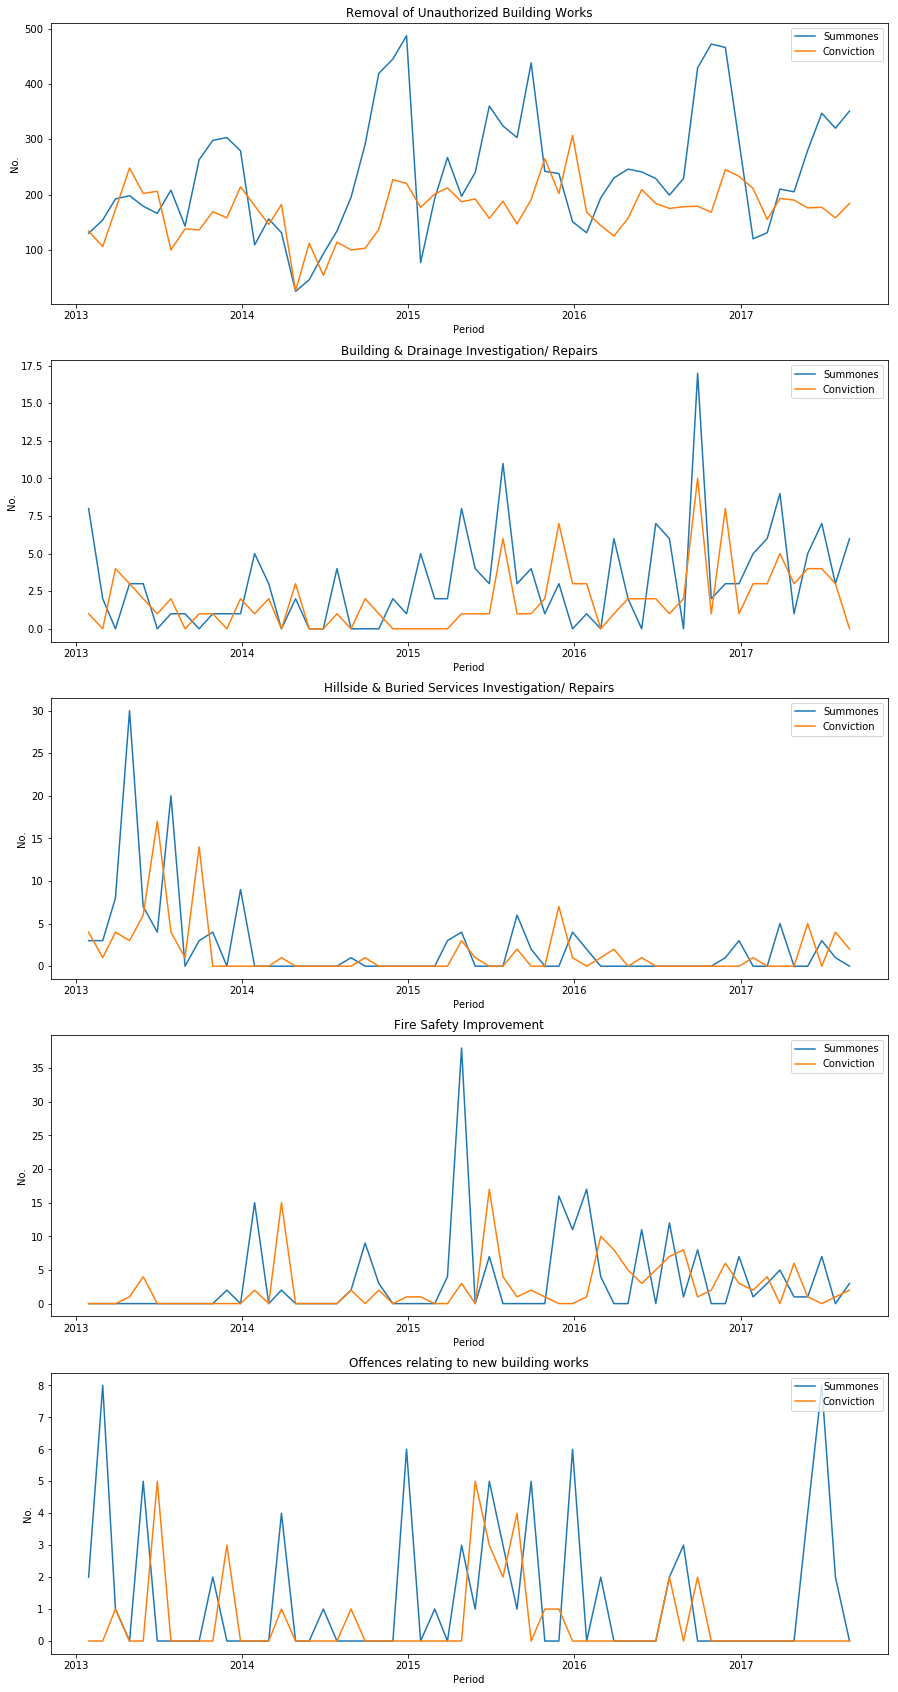

In [70]:
x = pros.index
y1 = pros['S_RUBW']
y2 = pros['C_RUBW']
y3 = pros['S_BDIR']
y4 = pros['C_BDIR']
y5 = pros['S_HBSIR']
y6 = pros['C_HBSIR']
y7 = pros['S_FSI']
y8 = pros['C_FSI']
y9 = pros['S_Offen']
y10 = pros['C_Offen']

f, ax = plt.subplots(5,figsize=(15,30))
ax[0].plot(x,y1,label='Summones')
ax[0].plot(x,y2,label='Conviction')
ax[0].set_xlabel('Period')
ax[0].set_ylabel('No.')
ax[0].set_title('Removal of Unauthorized Building Works')
ax[0].legend(loc="upper right")

ax[1].plot(x,y3,label='Summones')
ax[1].plot(x,y4,label='Conviction')
ax[1].set_xlabel('Period')
ax[1].set_ylabel('No.')
ax[1].set_title('Building & Drainage Investigation/ Repairs')
ax[1].legend(loc="upper right")

ax[2].plot(x,y5, label='Summones')
ax[2].plot(x,y6,label='Conviction')
ax[2].set_xlabel('Period')
ax[2].set_ylabel('No.')
ax[2].set_title('Hillside & Buried Services Investigation/ Repairs')
ax[2].legend(loc="upper right")

ax[3].plot(x,y7,label='Summones')
ax[3].plot(x,y8,label='Conviction')
ax[3].set_xlabel('Period')
ax[3].set_ylabel('No.')
ax[3].set_title('Fire Safety Improvement')
ax[3].legend(loc="upper right")

ax[4].plot(x,y9,label='Summones')
ax[4].plot(x,y10,label='Conviction')
ax[4].set_xlabel('Period')
ax[4].set_ylabel('No.')
ax[4].set_title('Offences relating to new building works')
ax[4].legend(loc="upper right")

f.show

In [109]:
year = pros.index.year
g = pros.groupby(year)
year_sum=g.sum()
year_sum

,S_RUBW,S_BDIR,S_HBSIR,S_FSI,S_Offen,C_RUBW,C_BDIR,C_HBSIR,C_FSI,C_Offen
Date,,,,,,,,,,
2013,2513,21,91,2,18,1984,17,54,5,9
2014,2531,17,1,31,11,1601,10,2,22,2
2015,3030,46,19,76,25,2426,23,14,29,16
2016,3362,47,6,60,7,2165,33,4,59,4
2017,1964,42,9,21,14,1444,25,12,16,0


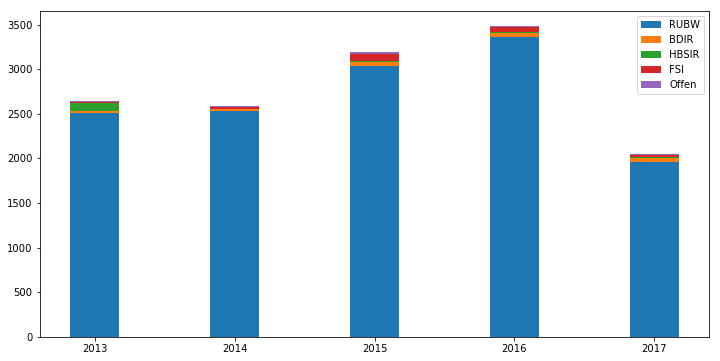

In [147]:
N = 5
ind = year_sum.index   # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

b1 = year_sum['S_RUBW']
b2 = b1 + year_sum['S_BDIR']
b3 = b2 + year_sum['S_HBSIR']
b4 = b3 + year_sum['S_FSI']

plt.figure(figsize=(12,6))
p1 = plt.bar(ind, year_sum['S_RUBW'], width, label='RUBW')
p2 = plt.bar(ind, year_sum['S_BDIR'], width, bottom= b1 , label='BDIR')
P3 = plt.bar(ind, year_sum['S_HBSIR'], width, bottom= b2 , label='HBSIR')
P4 = plt.bar(ind, year_sum['S_FSI'], width, bottom= b3 , label='FSI')
P5 = plt.bar(ind, year_sum['S_Offen'], width, bottom= b4 , label='Offen')

plt.ylabel('No.')
plt.xlabel('Period')
plt.title('No.by group and Year')
plt.legend()
plt.show()